# Validation of liquefaction models

The purpose of this notebook is to validate our implementation of the liquefaction models. We have gathered images of relevant figures from the original references, and overlaid the corresponding data generated using the ucla_plha code. The original papers use lines of various color to represent the dividing line in penetration resistance vs. CSR space. Note that probabilities of liquefaction of 15, 50, and 85% correspond to the mean plus -1.036, 0.0, and 1.036 standard deviations, respectively. 

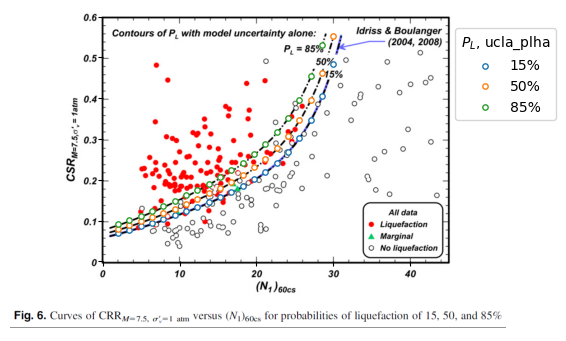

In [97]:
# Boulanger and Idriss 2012

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ucla_plha.liquefaction_models import boulanger_idriss_2012 as bi12

n160 = np.linspace(2, 30, 20)
m = np.asarray([7.5])
pa = 101.325
sigmavp = pa
fc = 0
mu_crr = np.empty((3, len(n160)), dtype=float)
PL = np.asarray([0.15, 0.50, 0.85], dtype=float)
Nsigma = norm.ppf(PL)
for i in range(len(n160)):
    mu_ln_crr, sigma_ln_crr = bi12.get_ln_crr(m, n160[i], fc, sigmavp, pa)
    for j, nsigma in enumerate(Nsigma):
        mu_crr[j, i] = np.exp(mu_ln_crr[j] + nsigma * sigma_ln_cr
    mu_crr[0, i] = np.exp(mu_ln_crr[0] - 1.036 * sigma_ln_crr[0])
    mu_crr[1, i] = np.exp(mu_ln_crr[0])
    mu_crr[2, i] = np.exp(mu_ln_crr[0] + 1.036 * sigma_ln_crr[0])

fig, ax_img = plt.subplots()

image = mpimg.imread("bi12_fig6.png")
ax_img.imshow(image)
ax_img.axis("off")

ax_data = fig.add_axes((0.27,0.305,0.54,0.51), frameon=False)
ax_data.set_ylim(0,0.6)
ax_data.set_xlim(0,45)
ax_data.scatter(n160, mu_crr[0], facecolor='white', edgecolor='C0', s=15, label='15%')
ax_data.scatter(n160, mu_crr[1], facecolor='white', edgecolor='C1', s=15, label='50%')
ax_data.scatter(n160, mu_crr[2], facecolor='white', edgecolor='C2', s=15, label='85%')
ax_data.legend(loc='upper left', bbox_to_anchor=(1.0,0.98,0,0), title=r'$P_L$, ucla_plha')
ax_data.tick_params(axis='x', labelbottom=False)
ax_data.tick_params(axis='y', labelleft=False)

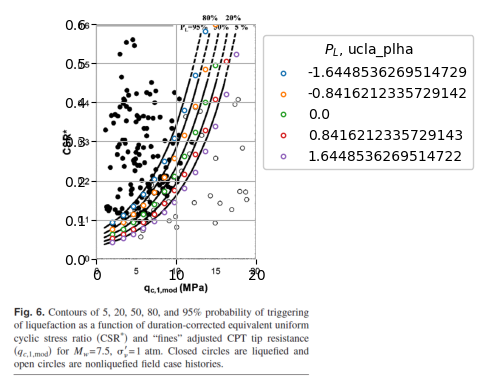

In [136]:
# Moss et al. 2006

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ucla_plha.liquefaction_models import moss_et_al_2006 as mea06

PL = np.asarray([0.05, 0.20, 0.50, 0.80, 0.95], dtype=float)
Nsigma = norm.ppf(PL)
qc1 = np.linspace(2, 20, 15)
Rf = 0.2
fs = Rf / 100 * qc1
m = np.asarray([7.5])
pa = 101.325
sigmavp = pa
mu_crr = np.empty((len(Nsigma), len(qc1Ncs)), dtype=float)
for i in range(len(qc1Ncs)):
    mu_ln_crr, sigma_ln_crr = mea06.get_ln_crr(m, np.log(0.2), qc1[i], fs[i], sigmavp, pa)
    for j, nsigma in enumerate(Nsigma):
        mu_crr[j, i] = np.exp(mu_ln_crr[0] - nsigma * sigma_ln_crr[0])

fig, ax_img = plt.subplots()

image = mpimg.imread("mea06_fig6.png")
ax_img.imshow(image)
ax_img.axis("off")

ax_data = fig.add_axes((0.413,0.36,0.25,0.49), frameon=False)
ax_data.set_ylim(0.0,0.6)
ax_data.set_xlim(0,20)
colors = ['C0', 'C1', 'C2', 'C3', 'C4']
for i in range(len(PL)):
    ax_data.scatter(qc1, mu_crr[i], facecolor='white', edgecolor=colors[i], s=10, label=str(Nsigma[i]))

ax_data.legend(loc='upper left', bbox_to_anchor=(1.0,0.98,0,0), title=r'$P_L$, ucla_plha', framealpha=1.0)
ax_data.grid(True)
# ax_data.tick_params(axis='x', labelbottom=False)
# ax_data.tick_params(axis='y', labelleft=False)

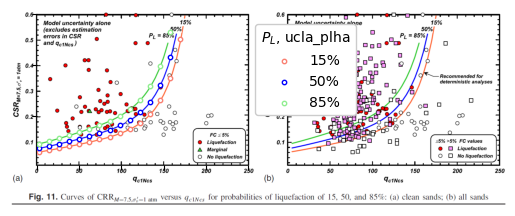

In [103]:
# Boulanger and Idriss 2016

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ucla_plha.liquefaction_models import boulanger_idriss_2016 as bi16

qc1Ncs = np.linspace(2, 170, 15)
m = np.asarray([7.5])
pa = 101.325
sigmavp = pa
mu_crr = np.empty((3, len(qc1Ncs)), dtype=float)
PL = np.asarray([0.15, 0.50, 0.85], dtype=float)
Nsigma = norm.ppf(PL)

for i in range(len(qc1Ncs)):
    mu_ln_crr, sigma_ln_crr = bi16.get_ln_crr(m, qc1Ncs[i], sigmavp, pa)
    for j, nsigma in enumerate(Nsigma):
        mu_crr[j, i] = np.exp(mu_ln_crr[0] + nsigma * sigma_ln_crr[0])

fig, ax_img = plt.subplots()

image = mpimg.imread("bi16_fig11.png")
ax_img.imshow(image)
ax_img.axis("off")

ax_data = fig.add_axes((0.167,0.376,0.33,0.315), frameon=False)
ax_data.set_ylim(0.01,0.6)
ax_data.set_xlim(0,250)
ax_data.scatter(qc1Ncs, mu_crr[0], facecolor='white', edgecolor='salmon', s=10, label='15%')
ax_data.scatter(qc1Ncs, mu_crr[1], facecolor='white', edgecolor='blue', s=10, label='50%')
ax_data.scatter(qc1Ncs, mu_crr[2], facecolor='white', edgecolor='lightgreen', s=10, label='85%')
ax_data.legend(loc='upper left', bbox_to_anchor=(1.0,0.98,0,0), title=r'$P_L$, ucla_plha', framealpha=1.0)
ax_data.tick_params(axis='x', labelbottom=False)
ax_data.tick_params(axis='y', labelleft=False)